# Warm up

**2. In a jupyter notebook, import pandas and read in the penguins_simple.csv file**

In [1]:
import pandas as pd

df = pd.read_csv('penguins_simple.csv', sep=';')

In [2]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


## Q: How can we make this dataset cleaner ?

# Objectives

1. What are Tidy and Untidy data formats ? 
2. How to use stack/unstack to change dataframe format ?
3. How to use pd.melt to transform wide format into long format ?
4. Exercise from this week's project

## 1. What are Tidy and Untidy data formats ? 

**Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:**
- each variable is a column
- each observation is a row 
- and each type of observational unit is a table

Tidy data makes it easy for an analyst or a computer to extract needed variables because it
provides a standard way of structuring a dataset. It is also very pleasant to work with in the data exploration and plotting phases of a data project.

**Untidy datasets can violate the Tidy data structure rules above in different ways. For example:**

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.


### Let's clean the column names in the penguins dataframe

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_', regex=False).str.\
             replace('(', '', regex=False).str.replace(')', '', regex=False)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


## 2. How to use stack and unstack to change the DF format ?

### Q: How can I get the average mass of penguins, grouped by both species and Sex?

In [36]:
untidy_avgs = df.groupby(['species', 'sex'])['body_mass_g'].mean()

untidy_avgs

species    sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: body_mass_g, dtype: float64

In [37]:
# we can tidy this up by simply resetting the index
tidy_avgs = untidy_avgs.reset_index()
tidy_avgs

,species,sex,body_mass_g
0,Adelie,FEMALE,3368.835616
1,Adelie,MALE,4043.493151
2,Chinstrap,FEMALE,3527.205882
3,Chinstrap,MALE,3938.970588
4,Gentoo,FEMALE,4679.741379
5,Gentoo,MALE,5484.836066


In [38]:
# we can also use df.unstack() to convert a level of the multi-index to columns

untidy_avgs.unstack(0)

species,Adelie,Chinstrap,Gentoo
sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


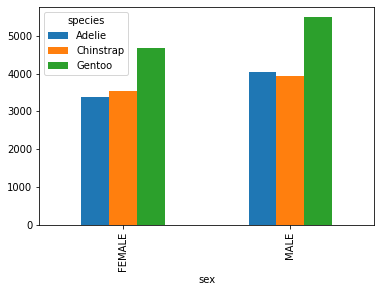

In [39]:
untidy_avgs.unstack(0).plot(kind='bar');

In [40]:
untidy_avgs.unstack(1)

sex,FEMALE,MALE
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


<AxesSubplot:xlabel='species'>

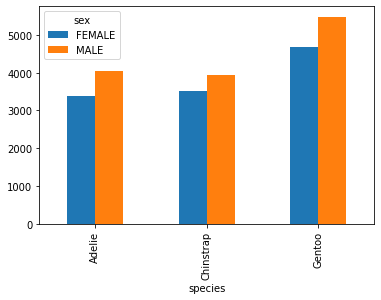

In [41]:
untidy_avgs.unstack(1).plot(kind='bar')

### the reverse operation is stacking or "melting". Wide -> Long

In [42]:
wide_format = untidy_avgs.unstack(0)
wide_format


species,Adelie,Chinstrap,Gentoo
sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


In [43]:
long_format = wide_format.stack().reset_index()
long_format

,sex,species,0
0,FEMALE,Adelie,3368.835616
1,FEMALE,Chinstrap,3527.205882
2,FEMALE,Gentoo,4679.741379
3,MALE,Adelie,4043.493151
4,MALE,Chinstrap,3938.970588
5,MALE,Gentoo,5484.836066


## 3. How to used pd.melt ?


In [48]:
# we can also use pd.melt

pd.melt(wide_format.reset_index(), id_vars='sex', var_name='species', value_name='avg_mass')

,sex,species,avg_mass
0,FEMALE,Adelie,3368.835616
1,MALE,Adelie,4043.493151
2,FEMALE,Chinstrap,3527.205882
3,MALE,Chinstrap,3938.970588
4,FEMALE,Gentoo,4679.741379
5,MALE,Gentoo,5484.836066


### Q: How can we apply the tidy data rules to the penguins dataset ?

In [19]:
# we can melt culmen measurements and have a single culmen column
# we can add a penguin id (not necessary)

In [49]:
df['penguin_id'] = df.index

df_melted = df.melt(id_vars=['penguin_id','sex', 'species'],  # columns from the original df that you want unchanged
        value_vars=['culmen_length_mm', 'culmen_depth_mm'], # columns from original df that you want melted
        var_name='culmen',  # new column name for the variable column, otherwise will just be called "variable"
        value_name='mm')    # new column name for the values column, otherwise will just be called "value"
df_melted

,penguin_id,sex,species,culmen,mm
0,0,MALE,Adelie,culmen_length_mm,39.1
1,1,FEMALE,Adelie,culmen_length_mm,39.5
2,2,FEMALE,Adelie,culmen_length_mm,40.3
3,3,FEMALE,Adelie,culmen_length_mm,36.7
4,4,MALE,Adelie,culmen_length_mm,39.3
...,...,...,...,...,...
661,328,FEMALE,Gentoo,culmen_depth_mm,13.7
662,329,FEMALE,Gentoo,culmen_depth_mm,14.3
663,330,MALE,Gentoo,culmen_depth_mm,15.7
664,331,FEMALE,Gentoo,culmen_depth_mm,14.8


In [50]:
# we can also clean the culmen column content

df_melted['culmen'] = df_melted['culmen'].replace(['culmen_length_mm', 'culmen_depth_mm'], ['length', 'depth'])

In [51]:
df_melted

,penguin_id,sex,species,culmen,mm
0,0,MALE,Adelie,length,39.1
1,1,FEMALE,Adelie,length,39.5
2,2,FEMALE,Adelie,length,40.3
3,3,FEMALE,Adelie,length,36.7
4,4,MALE,Adelie,length,39.3
...,...,...,...,...,...
661,328,FEMALE,Gentoo,depth,13.7
662,329,FEMALE,Gentoo,depth,14.3
663,330,MALE,Gentoo,depth,15.7
664,331,FEMALE,Gentoo,depth,14.8


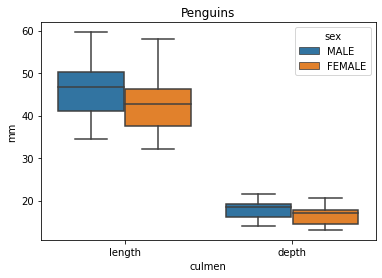

In [54]:
#useful because now we can analyze it as if it were a single variable

import seaborn as sns

ax = sns.boxplot(hue='sex', y='mm', x='culmen', data=df_melted);
ax.set_title('Penguins');

## 4. Exercise from this week's project

In [59]:
df = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)
df.dropna(inplace=True)
df.shape

(201, 217)

In [60]:
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


## Q: What is messy about this dataset ?

In [57]:
## a tidy format would have a long format, where each record/row is the life expectancy of a country, year pair

In [65]:
tidy_df = pd.melt(df.reset_index(), id_vars='Life expectancy')

tidy_df.head()

,Life expectancy,variable,value
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54


In [66]:
tidy_df.columns = ['country', 'year', 'life_expectancy']

tidy_df.head()

,country,year,life_expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54
